In [2]:
import pandas as pd
from ETL import ETL
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('dataset/2012.csv')

In [4]:
df = ETL(df)

c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_MON'] = df['FL_DATE'].apply(lambda x: x.month)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_DAY'] = df['FL_DATE'].apply(lambda x: x.day)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [22]:
# Selezioniamo le colonne di interesse e gestiamo eventuali valori nulli
df.dropna(subset=['DEP_DELAY', 'ARR_DELAY'], inplace=True)

# K-Means

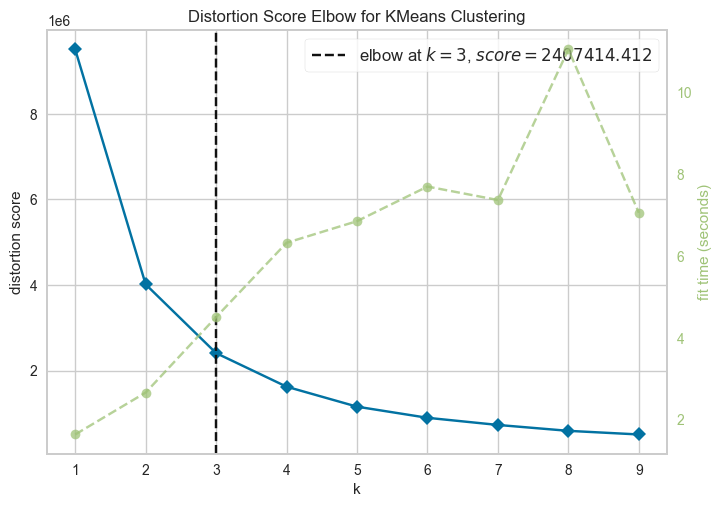

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['DEP_DELAY', 'ARR_DELAY']])

# Creazione del modello KMeans
model = KMeans(random_state=42)

# Utilizzo di KElbowVisualizer per determinare il numero ottimale di cluster
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=True)

# Fit dei dati e visualizzazione del grafico
visualizer.fit(data_scaled)
visualizer.show()

In [26]:
# Gestire eventuali valori nulli nelle altre colonne (se necessario)
df.fillna(0, inplace=True)

# Selezioniamo le colonne di interesse per il clustering
data = df[['DEP_DELAY', 'ARR_DELAY']]

# Standardizzazione dei dati per evitare che le variabili con valori più alti influenzino il clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applicazione del KMeans per il clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)


In [18]:
# Selezionare solo le colonne numeriche per il calcolo della media
cluster_summary = df.groupby('Cluster')[['DEP_DELAY', 'ARR_DELAY']].agg(['mean', 'max', 'min'])

# Stampare il riepilogo dei cluster
print(cluster_summary)


          DEP_DELAY                  ARR_DELAY               
               mean     max    min        mean     max    min
Cluster                                                      
0         -4.028764    18.0 -226.0   -8.501429    50.0 -411.0
1        133.197917   269.0   -4.0  132.443451   397.0   56.0
2        362.620613  1831.0  145.0  360.932511  1823.0  224.0
3         39.255259   114.0  -21.0   40.669968   191.0   15.0


In [ ]:
# Dopo aver osservato le caratteristiche, assegna nomi descrittivi ai cluster
# Supponiamo che dopo l'osservazione, i cluster possano essere classificati come Alto, Medio e Basso Rendimento
cluster_names = {0: 'Puntuale', 1: 'Ritardo importante', 2: 'Ritardo Grave'}

df['Cluster Nome'] = df['Cluster'].map(cluster_names)

C:\Users\dswal\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


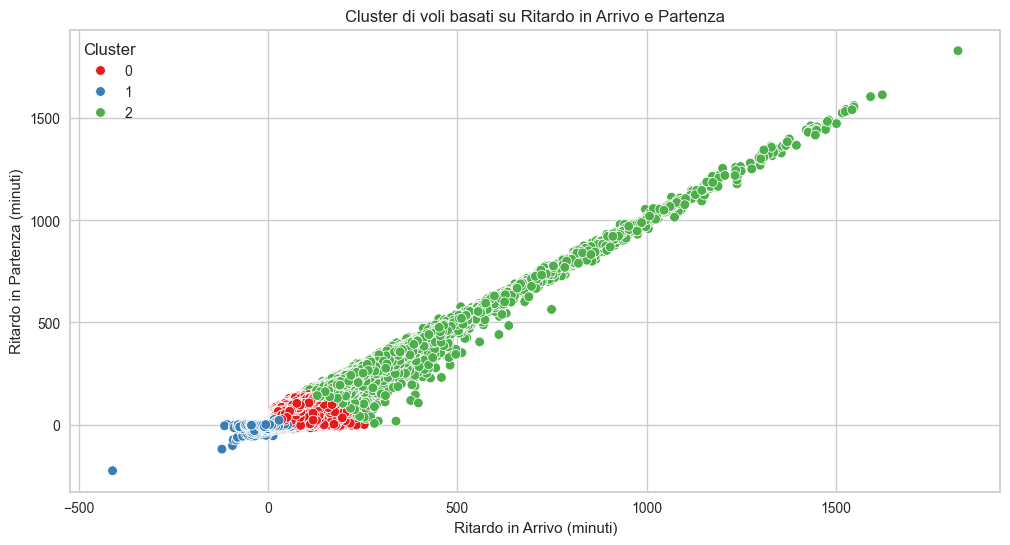

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ARR_DELAY', y='DEP_DELAY', hue='Cluster', data=df, palette='Set1', s=50)
plt.title('Cluster di voli basati su Ritardo in Arrivo e Partenza')
plt.xlabel('Ritardo in Arrivo (minuti)')
plt.ylabel('Ritardo in Partenza (minuti)')
plt.legend(title='Cluster')
plt.show()

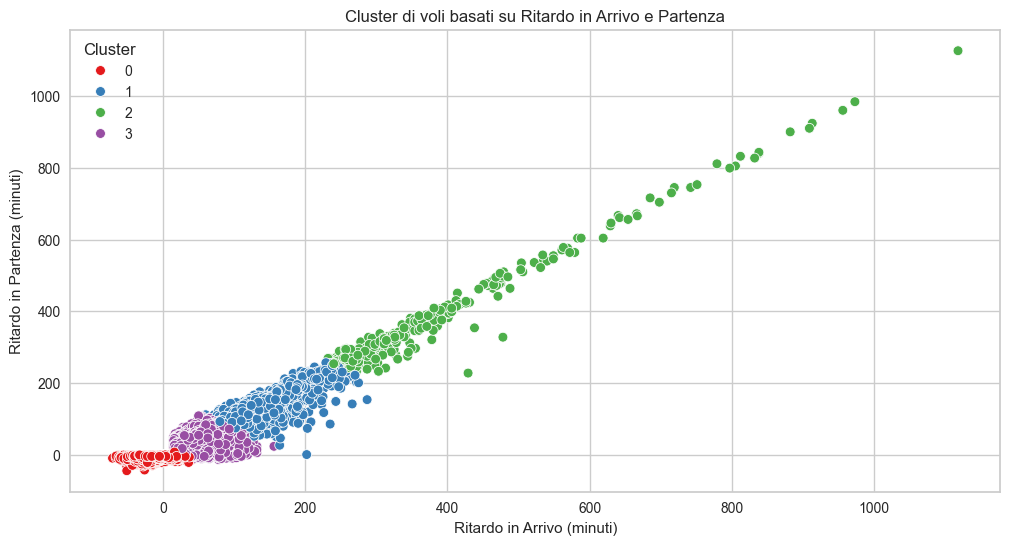

In [17]:
# Qui facciamo il sampling di solo 100 mila elementi
sample_df = df.sample(n=100000, random_state=42) 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ARR_DELAY', y='DEP_DELAY', hue='Cluster', data=sample_df, palette='Set1', s=50)
plt.title('Cluster di voli basati su Ritardo in Arrivo e Partenza')
plt.xlabel('Ritardo in Arrivo (minuti)')
plt.ylabel('Ritardo in Partenza (minuti)')
plt.legend(title='Cluster')
plt.show()


In [8]:
# Calcolo dei campioni di silhouette
silhouette_vals = silhouette_samples(data_scaled, df['Cluster'])

# Numero di cluster
n_clusters = kmeans.n_clusters
y_lower, y_upper = 0, 0
yticks = []

# Grafico
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none')
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(data_scaled, df['Cluster']), color="red", linestyle="--")
plt.yticks(yticks, [f'Cluster {i}' for i in range(n_clusters)])
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot per i Cluster")
plt.show()

KeyboardInterrupt: 

# Clustering gerarchico

In [ ]:
# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['DEP_DELAY', 'ARR_DELAY']])

# Cambiare il tipo di dati per risparmiare memoria
data_scaled = data_scaled.astype('float32')

# Applicazione di KMeans come alternativa ad AgglomerativeClustering
kmeans = KMeans(n_clusters=4)
df['Hierarchical_Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\dswal\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


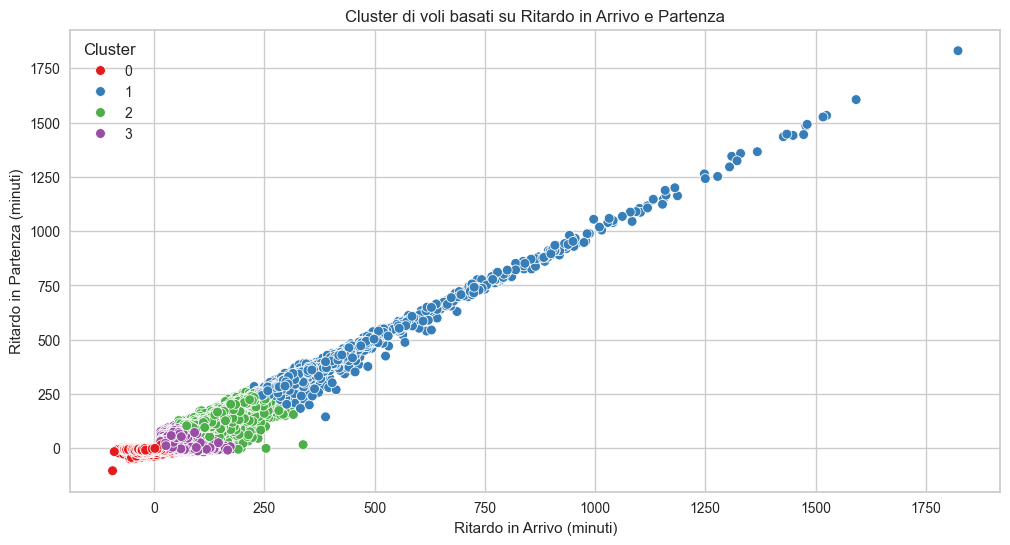

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ARR_DELAY', y='DEP_DELAY', hue='Hierarchical_Cluster', data=df, palette='Set1', s=50)
plt.title('Cluster di voli basati su Ritardo in Arrivo e Partenza')
plt.xlabel('Ritardo in Arrivo (minuti)')
plt.ylabel('Ritardo in Partenza (minuti)')
plt.legend(title='Cluster')
plt.show()